In [66]:
import matplotlib.pyplot as plt
import torchaudio
import torch
import numpy as np
import librosa
import librosa.display


def plot_waveforms(denoised, clean):
    plt.plot(denoised, 'r')
    plt.plot(clean, 'b')
    plt.show()

def get_waveform(fp):
    waveform, sample_rate = torchaudio.load(fp)
    resampler = torchaudio.transforms.Resample(sample_rate, 22050)
    resampled_waveform = resampler(waveform)
    return resampled_waveform

In [63]:
def plot_waveforms(noisy_fp, clean_fp, denoised_fp, title=None):
    fig, ax = plt.subplots(3)
    
    if title:
        fig.suptitle(title)

    noisy = get_waveform(noisy_fp)
    clean = get_waveform(clean_fp)
    denoised = get_waveform(denoised_fp)
    timesteps = torch.arange(start=0, end=clean.size(1))

    ax[0].plot(timesteps, noisy.squeeze(0), 'r')
    ax[0].set_title('Noisy')

    ax[1].plot(timesteps, denoised.squeeze(0), 'b')
    ax[1].set_title('Denoised')

    ax[2].plot(timesteps, clean.squeeze(0), 'g')
    ax[2].set_title('Clean')

    fig.tight_layout()
    plt.savefig('data/plots/myplot.png')

    plt.show()

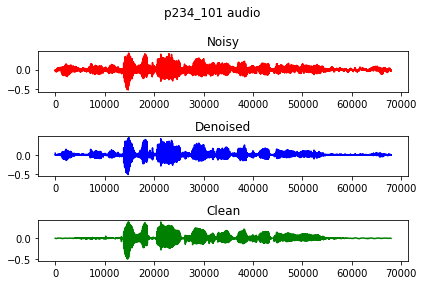

In [64]:
noisy_fp = 'data/p234_101.wav'
clean_fp = 'data/p234_101_clean.wav'
denoised_fp = 'data/p234_101_denoised.wav'

plot_waveforms(noisy_fp, clean_fp, denoised_fp, title='p234_101 audio')

In [102]:
def spectogram(fp, fig, ax, title='audio'):
    audio, _ = librosa.load(fp)
    audio_stft = librosa.stft(audio)
    audio_db = librosa.amplitude_to_db(np.abs(audio_stft), ref=np.max)
    if title:
        ax.set_title(title)
    img = librosa.display.specshow(audio_db, x_axis='time', y_axis='linear', ax=ax)
    fig.colorbar(img, ax=ax, format="%+2.f dB")

def plot_spectograms(noisy_fp, clean_fp, denoised_fp, title=None):
    fig, ax = plt.subplots(1, 3, figsize=(12,6))

    if title:
        fig.suptitle(title)

    spectogram(noisy_fp, fig, ax[0], 'Noisy')
    spectogram(clean_fp, fig, ax[1], 'Clean')
    spectogram(denoised_fp, fig, ax[2], 'Denoised')

    fig.tight_layout()

    plt.show()

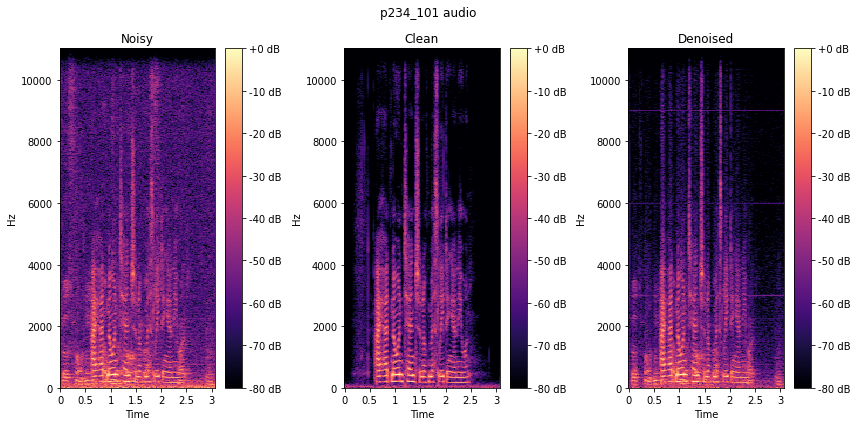

In [103]:
plot_spectograms(noisy_fp, clean_fp, denoised_fp, title='p234_101 audio')